# Exploratory Data Analysis and Data Cleaning 

Here I will explore my data I've pulled from Reddit and address null values.

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [36]:
posts_df = pd.read_csv('./data/reddit_posts.csv')

C:\Users\12155\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,4,6,23,68,69,70,73,74,76,77,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Exploratory Data Analysis - check my DataFrame for some basic information (column names, total number of entries, null values)

In [37]:
posts_df.head()

,Unnamed: 0,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_patreon_flair,...,author_flair_background_color,author_flair_text_color,steward_reports,removed_by,updated_utc,og_description,og_title,gilded,rte_mode,link_flair_text
0,0,[],False,ManofTheNightsWatch,NaN,[],NaN,text,t2_dgjcs,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[],False,dwaxe,NaN,[],NaN,text,t2_3jamc,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,[],True,Sanlear,NaN,[],NaN,text,t2_d0xcf,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,[],False,aresef,NaN,[],NaN,text,t2_5mtwj,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,[],False,aresef,NaN,[],NaN,text,t2_5mtwj,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
posts_df.columns

Index(['Unnamed: 0', 'all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media',
       'media_embed', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'post_hint', 'preview', 'pwls', 'retrieved_on', 'score',
       'secure_media', 'secure_media_embed', 'selftext', 'send_replies',
       'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers'

In [39]:
posts_df = posts_df[['author', 'subreddit', 'selftext', 'title']]

In [40]:
posts_df.isnull().sum()

author           0
subreddit        0
selftext     17062
title            0
dtype: int64

In [41]:
posts_df.head()

,author,subreddit,selftext,title
0,ManofTheNightsWatch,TheOnion,NaN,Severely Injured Woman Heroically Fights Off P...
1,dwaxe,TheOnion,NaN,Severely Injured Woman Heroically Fights Off P...
2,Sanlear,TheOnion,NaN,Frat President Chews Out Brothers Infected Wit...
3,aresef,TheOnion,NaN,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...
4,aresef,TheOnion,NaN,Congressional Republicans Grill Postmaster Gen...


In [42]:
posts_df.shape

(17178, 4)

In [43]:
posts_df[posts_df['selftext'].notnull()]

,author,subreddit,selftext,title
135,[deleted],TheOnion,[deleted],Cubs Install Cardboard Cutouts Of Fans Pissing...
150,[deleted],TheOnion,[deleted],'It's like bombs loading on': Venice restricts...
198,[deleted],TheOnion,[deleted],"Trump Administration Plants 137,000 Corpses In..."
214,[deleted],TheOnion,[deleted],Local College Boy Shocked by Huge Shit Dumped ...
231,[deleted],TheOnion,[deleted],Washington Redskins Change Their Name To The D...
...,...,...,...,...
16192,[deleted],news,[deleted],"A 19-year-old who admitted to blackmail, reven..."
16418,[deleted],news,[deleted],Pennsylvania Attorney General leading up to 20...
16424,[deleted],news,[deleted],At least 20 states plan to sue Postal Service ...
16665,[deleted],news,[deleted],Democrats backtrack and remove demand to end f...


In [44]:
17178-116

17062

In [45]:
posts_df[posts_df['selftext']!= '[deleted]']

,author,subreddit,selftext,title
0,ManofTheNightsWatch,TheOnion,NaN,Severely Injured Woman Heroically Fights Off P...
1,dwaxe,TheOnion,NaN,Severely Injured Woman Heroically Fights Off P...
2,Sanlear,TheOnion,NaN,Frat President Chews Out Brothers Infected Wit...
3,aresef,TheOnion,NaN,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...
4,aresef,TheOnion,NaN,Congressional Republicans Grill Postmaster Gen...
...,...,...,...,...
17173,TraditionalDetail5,news,NaN,أمراض الغدة الكظرية
17174,BearsNecessity,news,NaN,Area high schools ready to play after Gov. DeW...
17175,popularnewsindia,news,NaN,"Sanjay Dutt, Alia Bhatt Starrer 'Sadak 2' Trai..."
17176,KhabarUttarakhandki,news,NaN,Passenger bus hijacked in Agra by finance comp...


### I've checked my whole data frame - all posts have either a null value or '[deleted]' in the selftext column so I will delete it

In [46]:
#Selftext is either '[deleted]' or a null value so I will also drop that column!
posts_df.drop(columns=['selftext'], inplace=True)

In [47]:
#make the subreddit column in binary - 0 is The Onion, 1 is news
posts_df['subreddit'] = posts_df['subreddit'].map({'TheOnion':0, 'news':1})
posts_df.head()

,author,subreddit,title
0,ManofTheNightsWatch,0,Severely Injured Woman Heroically Fights Off P...
1,dwaxe,0,Severely Injured Woman Heroically Fights Off P...
2,Sanlear,0,Frat President Chews Out Brothers Infected Wit...
3,aresef,0,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...
4,aresef,0,Congressional Republicans Grill Postmaster Gen...


In [65]:
#Add columns of character length and word count, from lab 5.02, for more exploration
#Look at work count and post lenght distribution
posts_df['title_length'] = posts_df['title'].apply(lambda x: len(x))
posts_df['title_word_count'] = posts_df['title'].apply(lambda x: len(x.split()))

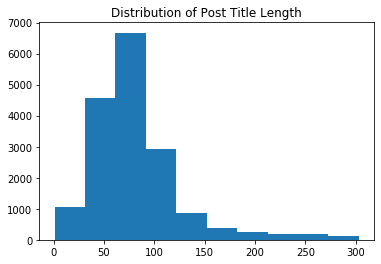

In [49]:
plt.hist(posts_df['title_length'])
plt.title('Distribution of Post Title Length');

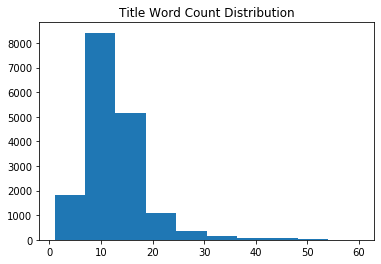

In [50]:
plt.hist(posts_df['title_word_count'])
plt.title('Title Word Count Distribution');

Based off the Word Count distributions, there do not appear to be any outliers. I will not be removing any posts based on outliers.

Both distributions are skewed to the right, meaning the majority have 15 or less words in the title

In [51]:
posts_df.head()

,author,subreddit,title,title_length,title_word_count
0,ManofTheNightsWatch,0,Severely Injured Woman Heroically Fights Off P...,93,14
1,dwaxe,0,Severely Injured Woman Heroically Fights Off P...,93,14
2,Sanlear,0,Frat President Chews Out Brothers Infected Wit...,107,15
3,aresef,0,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...,93,15
4,aresef,0,Congressional Republicans Grill Postmaster Gen...,89,9


In [52]:
posts_df.shape

(17178, 5)

### I've noticed some duplicates in the title (some things get posted by multiple users). I will delete duplicates so they are not counted twice

In [53]:
#drop duplicates of titles so those dont get counted twice in the classification models
posts_df.drop_duplicates(subset='title', inplace = True)

### Vectorize all words so I can look at what the most common ones are

In [54]:
#vectorize the titles to see how often each word is used
weird_words = ['_unique_id', 'feed_id', 'https', 'கள', 'khabaruttarakhandki', 'onion' ]
stop = stopwords.words('english') + weird_words
cvec = CountVectorizer(stop_words=stop)
X = posts_df['title']
X = cvec.fit_transform(X)

In [55]:
posts_words = pd.DataFrame(X.toarray(), 
                       columns=cvec.get_feature_names())
posts_words.head()

,000,000009,0004,000mw,007,017,02,0320,037,039,...,플럼버넥,하나,하얀,한승연,한화,함연지,함연지와,협력사,활동,후기
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
posts_words.shape

(15137, 27154)

In [57]:
#followed from 5.04 lesson (NLP2)
top_words = {}
for i in posts_words.columns:
    top_words[i] = posts_words[i].sum()
most_freq_words = pd.DataFrame(sorted(top_words.items(), key = lambda x: x[1], reverse = True))
most_freq_words.head(20)


,0,1
0,new,828
1,trump,721
2,man,559
3,covid,546
4,amp,509
5,coronavirus,504
6,19,475
7,2020,415
8,says,405
9,year,325


*Use this and the top 20 words for each subreddit (bottom of notebook) to determine extra stop words to add (like https)

### Save cleaned data frame and vectorized data frame for further use

In [58]:
#save cleaned df to use for grid search in next notebook
posts_df.to_csv('./data/cleaned_reddit_posts.csv')

### Make Visuals (using posts_df_vec from Notebook 4)

I decided to do this in notebook 2 even though it used a DataFrame from Notebook 4 because it felt more like exploration to me and I wanted to keep all the exploration together

In [60]:
posts_df_vec = pd.read_csv('./data/posts_df_vec.csv')
onion_posts = posts_df_vec[posts_df_vec['subreddit'] ==0].drop(columns=['Unnamed: 0', 'author', 'subreddit', 'title'])
onion_posts.head(3)
posts_df_vec.head(3)

,Unnamed: 0,author,subreddit,title,000,0320,08,10,100,10th,...,வந,வன,வமன,வர,வரத,வல,வழ,வழக,வழங,ஷன
0,0,ManofTheNightsWatch,0,Severely Injured Woman Heroically Fights Off P...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Sanlear,0,Frat President Chews Out Brothers Infected Wit...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,aresef,0,Jim Harbaugh Annoyed He Only Got $5.89 For Sel...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
onion_posts = posts_df_vec[posts_df_vec['subreddit'] ==0].drop(columns=['Unnamed: 0', 'author', 'subreddit', 'title'])
onion_posts.head(3)

,000,0320,08,10,100,10th,11,12,12th,13,...,வந,வன,வமன,வர,வரத,வல,வழ,வழக,வழங,ஷன
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
top_onion_words = {}
for i in onion_posts.columns:
    top_onion_words[i] = onion_posts[i].sum()
most_freq_words_onion = pd.DataFrame(sorted(top_onion_words.items(), key = lambda x: x[1], reverse = True))
most_freq_words_onion.head(20)

,0,1
0,new,461
1,man,398
2,trump,353
3,report,179
4,like,168
5,time,166
6,woman,160
7,year,152
8,get,148
9,one,147


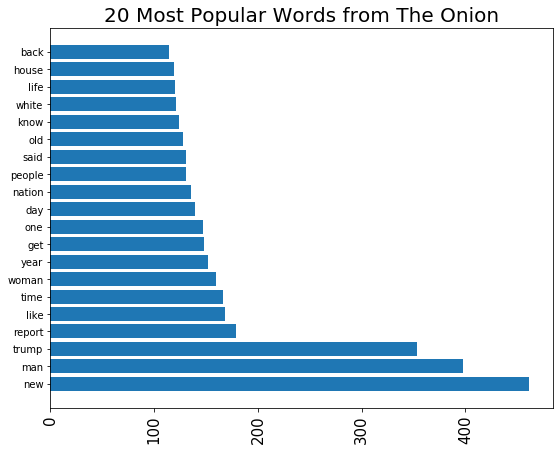

In [70]:
plt.figure(figsize=(9,7))
plt.barh(most_freq_words_onion[0][:20], most_freq_words_onion[1][:20])
plt.xticks(rotation=90, size=15)
plt.title('20 Most Popular Words from The Onion', size =20)
plt.savefig('./images/most_popular_onion.png');

In [67]:
news_posts = posts_df_vec[posts_df_vec['subreddit'] ==1].drop(columns=['Unnamed: 0', 'author', 'subreddit', 'title'])
news_posts.head(3)

,000,0320,08,10,100,10th,11,12,12th,13,...,வந,வன,வமன,வர,வரத,வல,வழ,வழக,வழங,ஷன
6516,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
top_news_words = {}
for i in news_posts.columns:
    top_news_words[i] = news_posts[i].sum()
most_freq_words_news = pd.DataFrame(sorted(top_news_words.items(), key = lambda x: x[1], reverse = True))
most_freq_words_news.head(20)

,0,1
0,covid,529
1,amp,494
2,19,453
3,coronavirus,429
4,2020,374
5,trump,368
6,new,367
7,says,301
8,apple,276
9,us,272


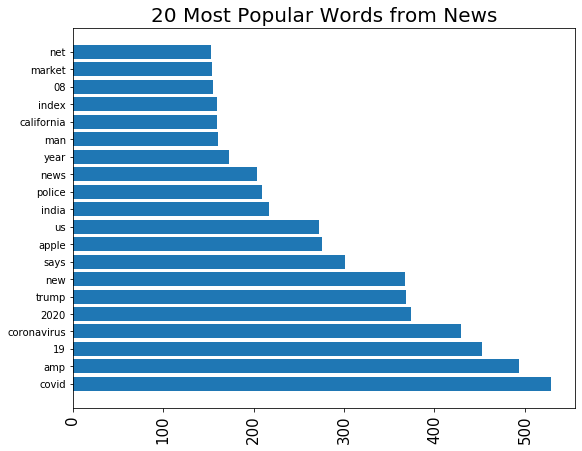

In [71]:
plt.figure(figsize=(9,7))
plt.barh(most_freq_words_news[0][:20], most_freq_words_news[1][:20])
plt.xticks(rotation=90, size = 15)
plt.title('20 Most Popular Words from News', size=20)
plt.savefig('./images/most_popular_news');


I have cleaned this data for future use and also explored the DataFrame to gather information about my data